# EXPLAINABLE ARTIFICIAL INTELLIGENCE (XAI)

In the field of Artificial Intelligence (AI) and Machine Learning (ML), the ability to explain model decisions has become a major concern. Model explainability not only helps understand how they make decisions but also detects biases, enhances user trust, and facilitates the adoption of these technologies across various domains.

Explain predictions of AI model using explainability methods like :

### LIME (Local Interpretable Model-agnostic Explanations)
### SHAP (SHapley Additive exPlanations)
### DiCE (Diverse Counterfactual Explanations)

### Download libraries

If you already have those libraries, please skip this step. Go to the next step _load libraries_

In [1]:
pip install shap #or conda install -c conda-forge shap
pip install pandas
pip install numpy
pip install sklearn
pip install matplotlib

SyntaxError: invalid syntax (3916552923.py, line 1)

### Load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Data

##### Description of dataset

This dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict, based on diagnostic measurements, whether a patient has diabetes.

Several constraints were imposed on selecting these instances from a larger database. In particular, all patients here are women aged at least 21 years old and of Pima Indian origin.

    - Pregnancies: Number of times pregnant
    - Glucose: Plasma glucose concentration over 2 hours during an oral glucose tolerance test
    - Blood Pressure: Diastolic blood pressure (mm Hg)
    - Skin Thickness: Triceps skin fold thickness (mm)
    - Insulin: 2-hour serum insulin (mu U/ml)
    - BMI: Body mass index (weight in kg/(height in m)^2)
    - DiabetesPedigreeFunction: Diabetes pedigree function
    - Age: Age (years)
    - Outcome: Class variable (0 or 1)

This dataset is used to demonstrate the application of explainability techniques in the context of this practical session (TP).

The dataset is available on : https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

### Read data

To import the dataset, we use the _read_csv()_ function from the Pandas library.

In [3]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


As we can seen the dataset has **768** observations and **9** features.

### Overview of data

We can see global statistics of each dataset feature with the _describe()_ function of Pandas.

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Dataset Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis (EDA)

The main objective of Exploratory Data Analysis (EDA) is to understand the key characteristics of the data you have at hand. Here are some specific objectives of EDA:
- Identify trends and patterns
- Evaluate data distribution
- Detect outliers
- Understand relationships between variables
- Communicate results effectively

### Correlation Heatmap

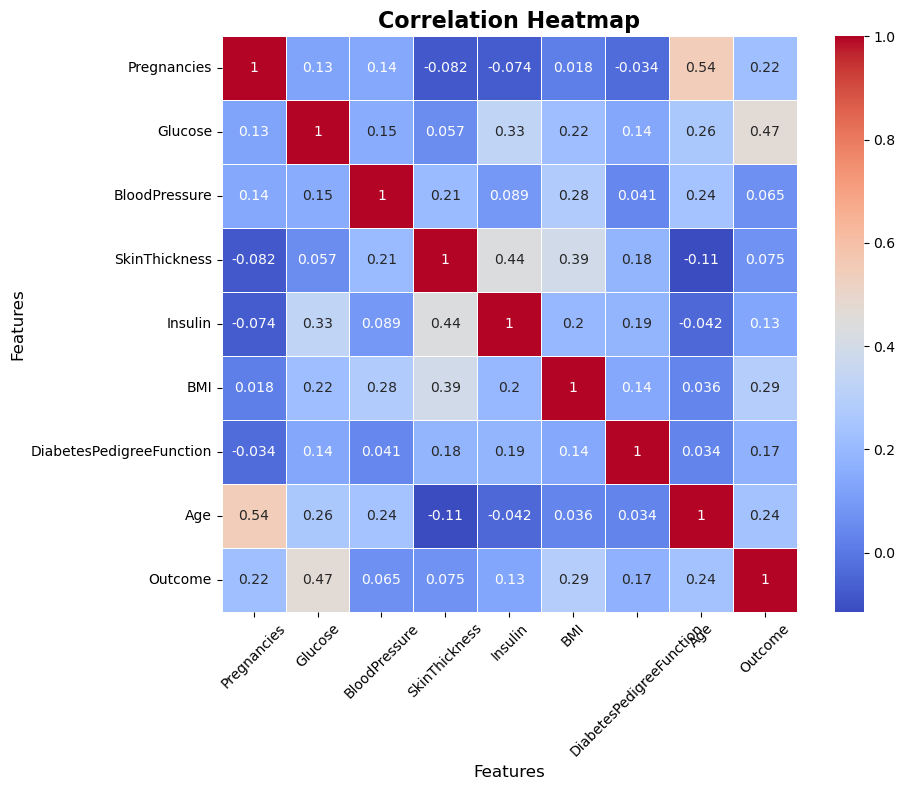

In [7]:
plt.figure(figsize=(10, 8))
data = df.copy(deep=True)
sns.heatmap(data.corr(), annot=True, fmt='.2g', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Labels distribution

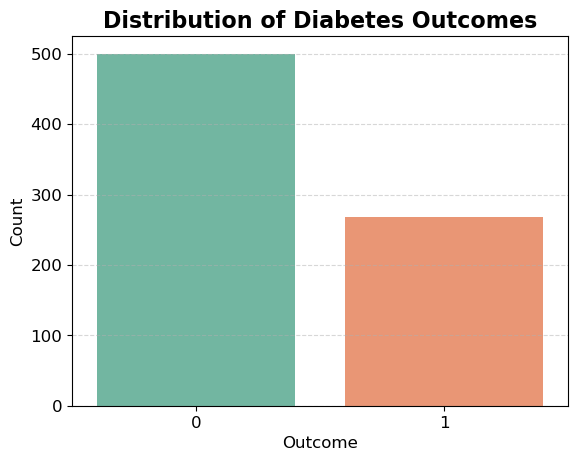

In [8]:
sns.barplot(x=data['Outcome'].value_counts().index, y=data['Outcome'].value_counts(), palette=['#66c2a5', '#fc8d62'])
plt.title("Distribution of Diabetes Outcomes", fontsize=16, fontweight='bold')
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Distribution of Attributes by Label

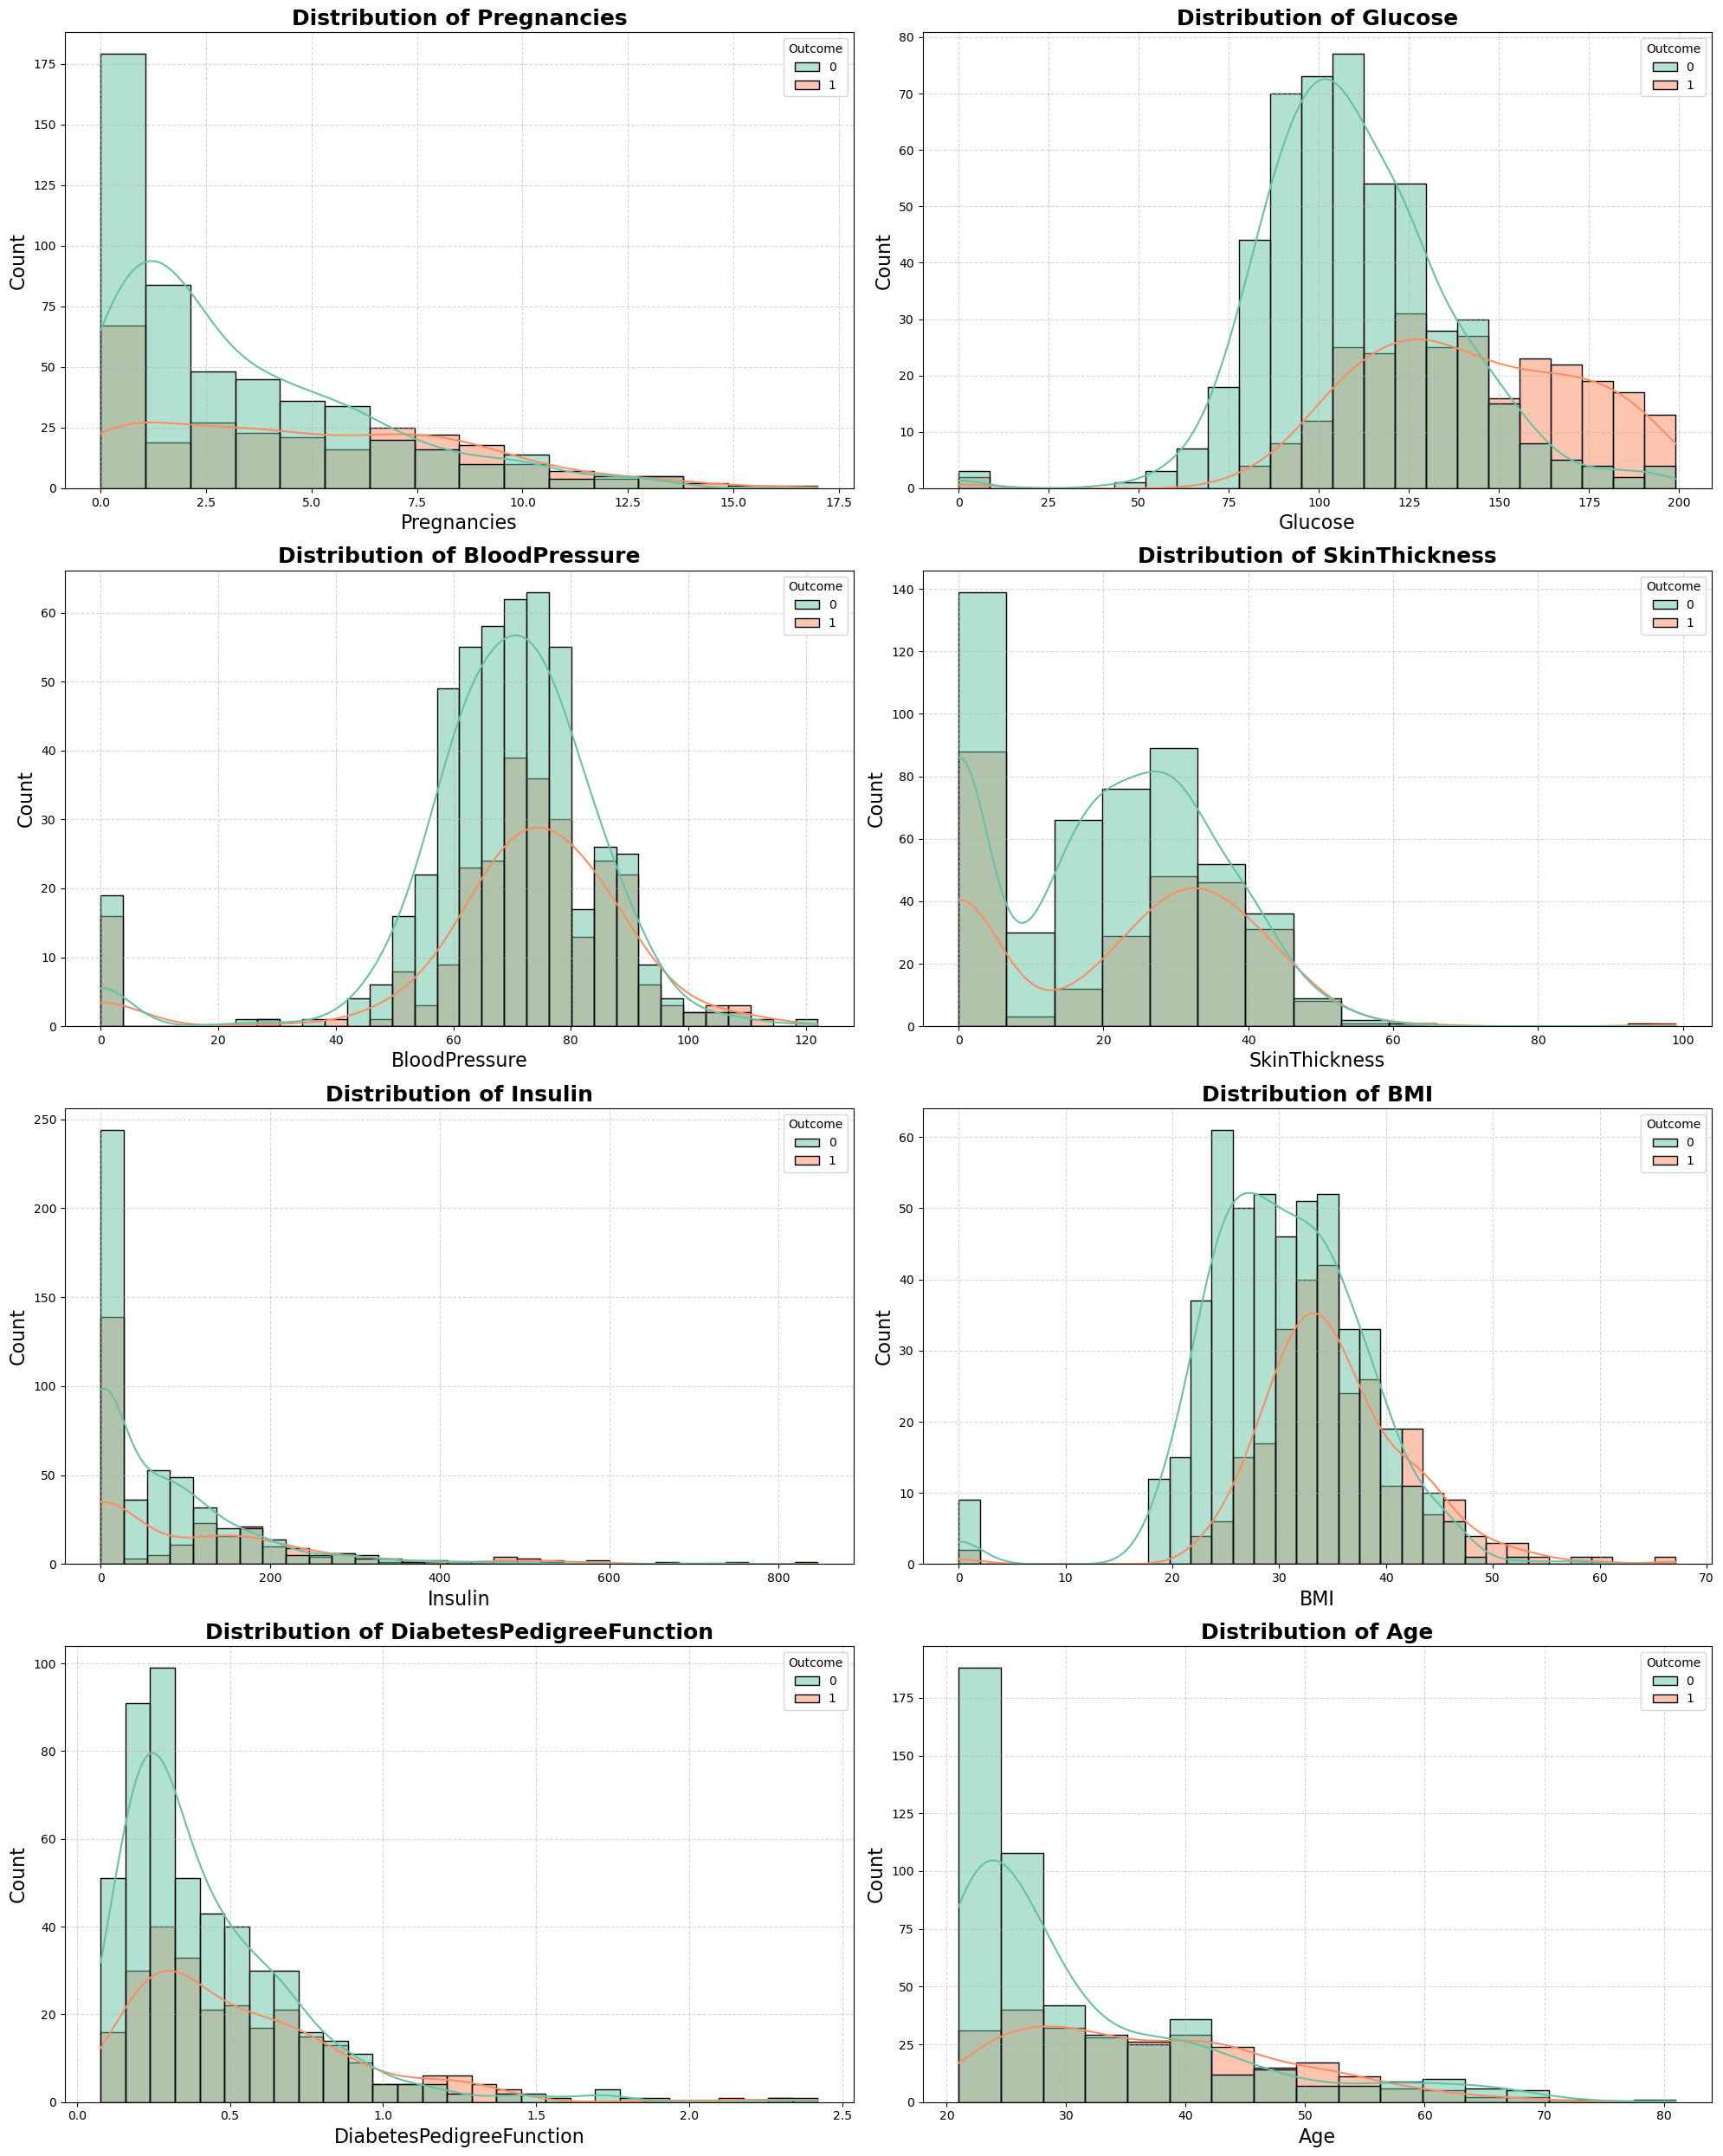

In [9]:
check_distribution = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

colors = ['#66c2a5', '#fc8d62']  # Green for Outcome 0, Orange for Outcome 1

plt.figure(figsize=(20, 25))
for i, feature in enumerate(check_distribution, start=1):
    plt.subplot(4, 2, i)
    sns.histplot(data=data, x=feature, hue='Outcome', kde=True, palette=colors, edgecolor='black')
    plt.title(f"Distribution of {feature}", fontsize=18, fontweight='bold')
    plt.xlabel(feature, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    plt.tight_layout()

plt.show()

### Checking missing values

We check for missing values.To do that, we use the _isnull()_ and _sum()_ functions from the Pandas library.

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There's no missing values

### Handling Zero Values in Features



In [11]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = len(data)  # Total number of cases in the dataset

for feature in zero_features:
    zero_count = (data[feature] == 0).sum()  # Count of zero values for the feature
    percent_zero = (zero_count / total_count) * 100  # Percentage of cases with zero values
    print(f"{feature}: {zero_count} cases with 0 ({percent_zero:.2f}% of total)")

Glucose: 5 cases with 0 (0.65% of total)
BloodPressure: 35 cases with 0 (4.56% of total)
SkinThickness: 227 cases with 0 (29.56% of total)
Insulin: 374 cases with 0 (48.70% of total)
BMI: 11 cases with 0 (1.43% of total)


In our Dataset, we have observed that certain features, such as SkinThickness and Insulin, have a high number of zero values. Although a zero value may be significant for these features in the context of diabetes, we lack expertise in this field to confirm it.

To address this issue, we will first replace the null values in these features with the mean value of the respective feature.



In [12]:
data_mean = data[zero_features].mean()
data[zero_features] = data[zero_features].replace(0, data_mean)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Repartition of target values

In [13]:
df.iloc[:,-1].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

For class _0_ we have 500 observations and for classe _1_ we have 268 observations

### Checking missing values

We check for missing values.To do that, we use the _isnull()_ and _sum()_ functions from the Pandas library.

In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There's no missing values

### Repartition of target values

In [15]:
df.iloc[:,-1].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

For class _0_ we have 500 observations and for classe _1_ we have 268 observations

### Checking missing values

We check for missing values.To do that, we use the _isnull()_ and _sum()_ functions from the Pandas library.

In [16]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There's no missing values

### Repartition of target values

In [17]:
df.iloc[:,-1].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

For class _0_ we have 500 observations and for classe _1_ we have 268 observations

## MODEL BUILDING : Random Forest of 300 trees

Random Forest is a machine learning model that creates an ensemble of multiple decision trees and then combines the output of those decision trees to reach a single result.

We will build a Random forest for Classification task

We use RandomForestClassifier() of sklearn library to predict the target "Outcome"

### Train the model

To begin, we split the data into independent variables (X) and dependent variable (Y) and use the _train_test_split()_ function from sklearn library and divide the dataset into training and test sets.

In [18]:
X, Y =df.iloc[:, :-1], df.iloc[:, -1]
X_featurenames = df.columns

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print({"X_train size":X_train.shape, "X_test size":X_test.shape})

# Build the MLP model
model = RandomForestClassifier(random_state=42, n_estimators=300, max_depth= 4)

model.fit(X_train.values, Y_train.values)

{'X_train size': (614, 8), 'X_test size': (154, 8)}


RandomForestClassifier(max_depth=4, n_estimators=300, random_state=42)

### Model performance

In [19]:
y_pred = model.predict(X_test.values)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



As we can see we have *79%* as accuracy.

Great ! Now that we have built the model, let's understand how it is working out!

## SHAP
SHapley Additive exPlanation is a game theoretic approach to explain the output of any machine learning model. It  explain the prediction of an instance x by computing the contribution of each feature to the prediction.

The key idea of SHAP is to calculate the Shapley values for each feature of the dataset used to train and test the machine learning model which is to be interpreted. Each Shapley value represents the impact /contribution that the feature have in generating the prediction delivered by the model.

Calculate shap values:
1. Get all possibles combinaisons of features
2. For each feature j, calculate

  2.1. For each combination,
	  Calculate (prediction without this feature - prediction with this feature)

  2.2. Sum the result given for each combinaison to obtain shap value of feature j



[shap](https://shap.readthedocs.io/en/latest/) python package implements SHAP
method

### Build explainer

We use KernelExplainer() of shap library to explain prediction made by the Random Forest model.

KernelShap is agnostic version of SHAP.

In [20]:
import shap
shap.initjs() # JavaScript plots

#create explainer
explainer= shap.KernelExplainer(model.predict, X_train)

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


### Explain one prediction

In [21]:
# Compute the estimated Shapley values
index = 0 #choosen instance
observation = X_test.iloc[index,:]
shap_values = explainer.shap_values(observation)
print("Shape of explanation : ",shap_values.shape)
shap_values

Shape of explanation :  (8,)


array([-0.04755313, -0.30057003, -0.01576702,  0.00736001,  0.02811773,
        0.02687296, -0.00447495,  0.0503141 ])

In [22]:
#save shap values
from numpy import savetxt
savetxt('shap_values_obs'+ str(index)+'.csv', shap_values, delimiter=';')

#### Plots
shap library allow us to generate many plots in such a way to visualize shap values in different manners

We first build explanation using shap_values, data and expected values

In [23]:
explanation = shap.Explanation(shap_values, data=observation, base_values=explainer.expected_value)#mean(y_train_pred)

    Force plot
   

<Figure size 640x480 with 0 Axes>

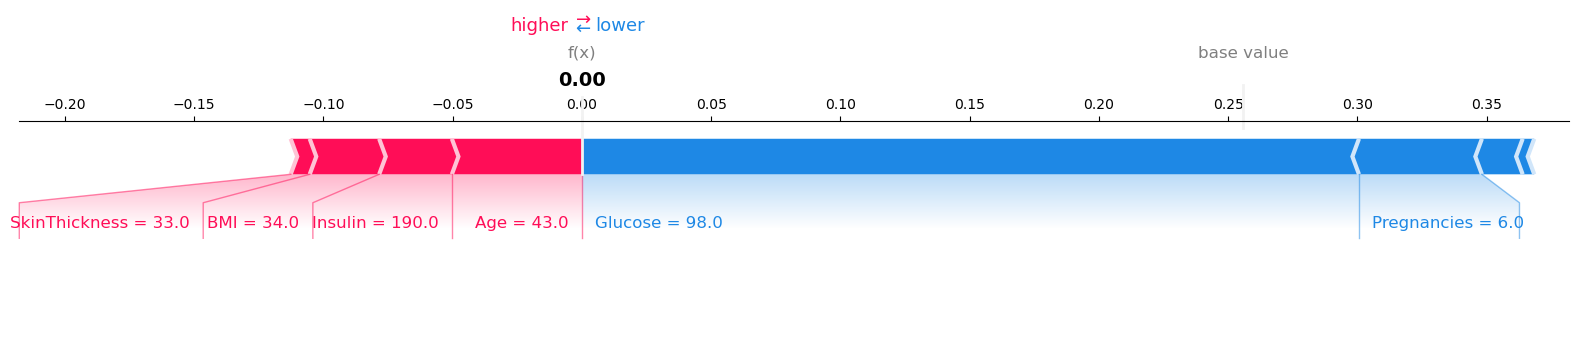

In [32]:
shap.force_plot(explanation,matplotlib=True,show=True)

#save image
pl.savefig("force_plot_"+str(index)+".png")

We can see that **glucose and pregnancies** contribute to reduce the output
the others features **(age, insulin, BMI, SkinTchickness)** contribute to increase the output

    decision plot

In [25]:
shap.decision_plot(explainer.expected_value, shap_values, X_train.columns, show=False)
#save image
pl.savefig("decision_plot_"+str(index)+".png")

#### Exercise 1.1 : generate a bar plot for one explanation

Generate a bar plot explaining the first observation of test set and save the image

    Tip : use plots.bar() function of shap package
    
    (see https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html )

    bar plot

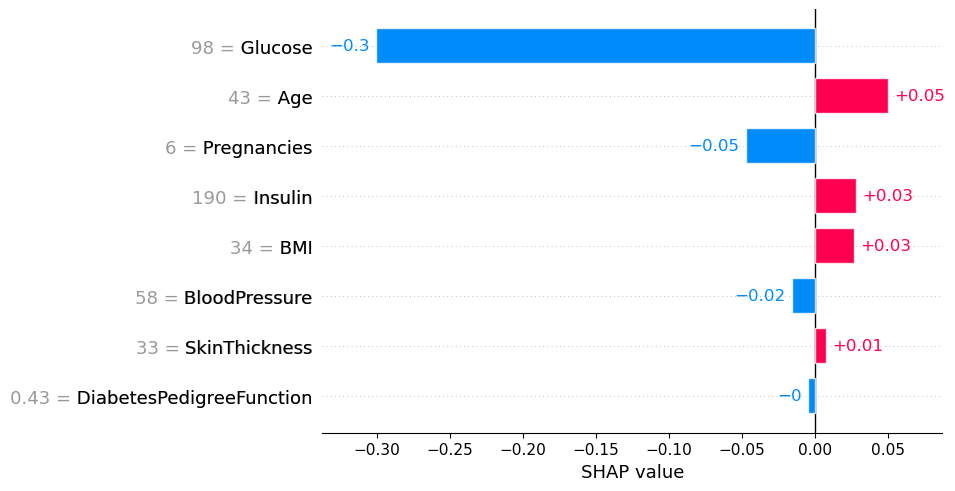

In [34]:
shap.plots.bar(explanation)

__Les variables__: 

``Glucose = 98`` n'est pas une caractéristique importante dans la décision de diabete d'une patient
``Age = 43``est la variable la plus importante dans la décision du diabète

de façon générale, les branchements ``Pregnancies = 6``, ``BloodPressure = 33`` n'ont pas une forte importance mais sont considéré dans la décision pour un patient non diabétique. ``Insulin = 190``, ``BMI = 34``, ``SkinThickness = 33`` sont des caractéristiques qui permettant dire qu'un patient est atteint du diabète.

    waterfall plot

In [35]:
shap.waterfall_plot(explanation, show=False)
pl.savefig("waterfall_plot_"+str(index)+".png")

### Explain a set of predictions

_SHAP_ package propose global explanations by using the mean of shapley values of a giving set of observations

#### Exercise 1.2 : explain the predictions of a set of observations

Calculate shap values of all observations in test set and save in csv file

In [36]:
#your code
# Compute the estimated Shapley values
# index = 0 #choosen instance
observation2 = X_test.iloc[:,:]
shap_values2 = explainer.shap_values(observation2)
print("Shape of explanation : ",shap_values2.shape)
shap_values2

  0%|          | 0/154 [00:00<?, ?it/s]

Shape of explanation :  (154, 8)


array([[-0.04755313, -0.30057003, -0.01576702, ...,  0.02687296,
        -0.00447495,  0.0503141 ],
       [-0.01859004, -0.16209089, -0.00313712, ...,  0.01890414,
        -0.03241042, -0.05499457],
       [-0.01636032, -0.15389328, -0.00319141, ...,  0.00313712,
        -0.02889716, -0.0527571 ],
       ...,
       [ 0.03719559, -0.3219986 , -0.00227237, ...,  0.03393439,
        -0.00749573,  0.04191484],
       [-0.02727819,  0.04517411, -0.0022588 , ..., -0.28482046,
         0.02027106, -0.02811579],
       [ 0.05380603, -0.36854545, -0.00239452, ...,  0.04147472,
         0.03902009,  0.04280479]])

In [37]:
shap_values2 = shap_values
explanation2 = shap.Explanation(shap_values2, data=X_test, base_values=explainer.expected_value)#mean(y_train_pred)

In [45]:
savetxt('shap_values_obs_all_2.csv', shap_values2, delimiter=';')

    summary plot

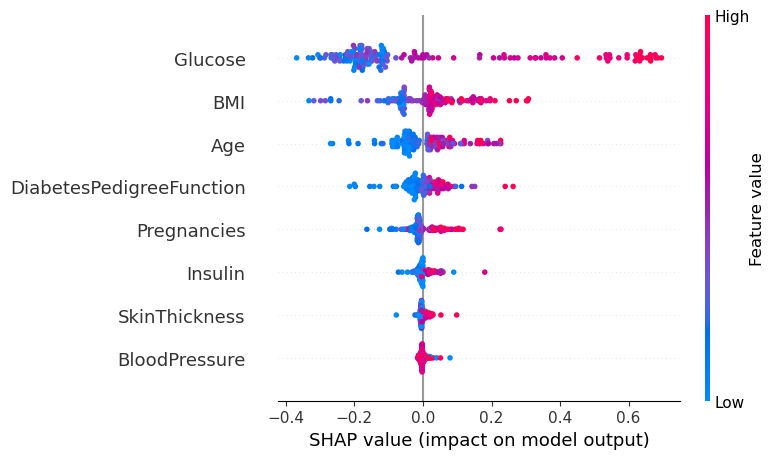

In [39]:
shap.summary_plot(shap_values2, X_test, show=True)
pl.savefig("summary_plot.png")

We can see that more the value of feature **glucose** is small more the impact on output model is small
but more this value is high more this feature has influence on the output

#### Exercise 1.3 : another variant of summary plot

Generate another variant of summary plot called _violin plot_ explaining all observations in test set

    Tip : use plots.violin () function
    (see: https://shap.readthedocs.io/en/stable/generated/shap.plots.violin.html)

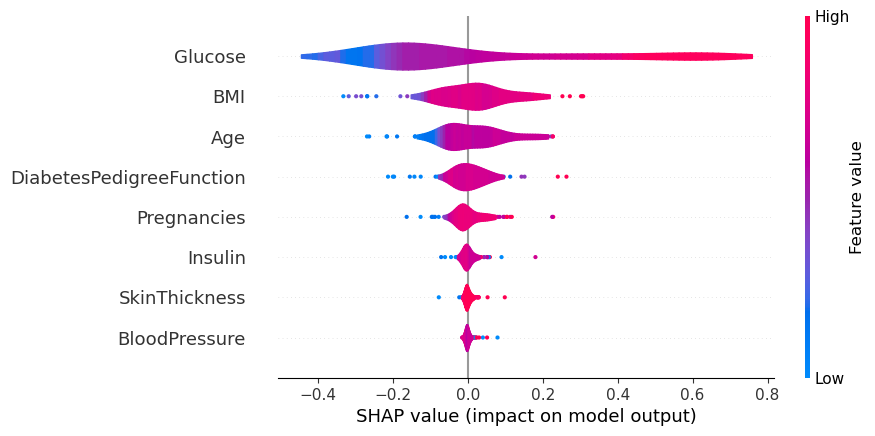

In [40]:
shap.plots.violin(explanation2)

    Feature importance

we can also generate features importance using _summary_plot_ function

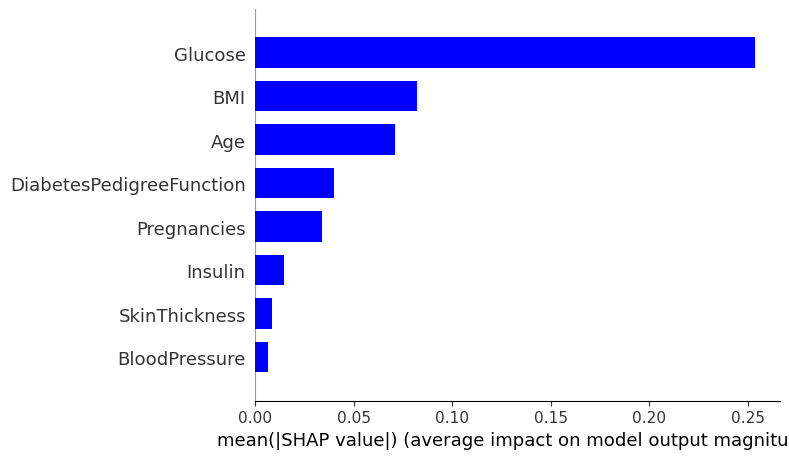

In [42]:
shap.summary_plot(shap_values2, X_test, plot_type="bar", color='blue', show=True)
pl.savefig("features_importance_test_set.png")

#### Exercise 1.4 : decision plot of a set of observations

Generate one decision plot explaining all observations in test set

    global decision plot

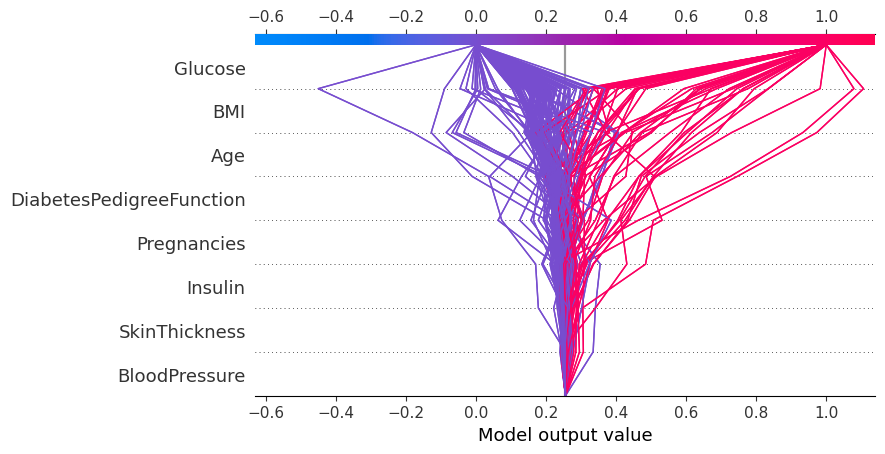

In [44]:
shap.decision_plot(explainer.expected_value, shap_values2, X_test.columns, show=True)
#save image
pl.savefig("decision_plot_all_2.png")

### Documentation

https://snyk.io/advisor/python/shap/functions/shap.KernelExplainer

https://shap.readthedocs.io/en/latest/

## LIME

In [ ]:
import lime
from lime import lime_tabular

LIME for *Local Interpretable Model-agnostic Explanation* [5]

Explanation Approach for every Machine Mearning model.

*   The intuition behind LIME is that every black-box model can be approximated locally to an interpretable model (linear models, decision trees, etc.)
*   The overall goal of LIME is to identify an
interpretable model over the interpretable representation
that is locally faithful to the classifier.


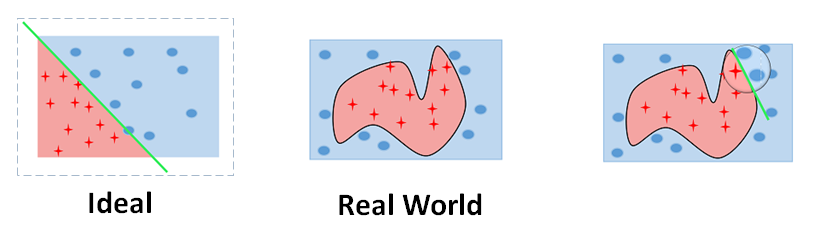

### Theorical LIME implementation

1.   Choose the instance to be explained
2.   Generate the neighborhood of that instance
3.   Predict the output of new neighbors
4.   Weight the new sample accordng to their proximity to the instance to be explained
5.   Train an interpretable model on the new training set (instance and its neighbors)
6.   Use the new interpretable model to explain the prediction of the instance

### Practical LIME implementation (using the _lime_ package)

### Build explainer

Depending on the type of dataset, _LIME_ package proposed image, text and tabular implementation.
So, as we work with tabular dataset we'll use **lime_tabular** module with the _LimeTabularExplainer()_ function

In [ ]:
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=X_train.columns,
                                                   class_names=['Not diabetes','Diabetes'], mode='classification', verbose=True, random_state=42)

### Explain one prediction

To explain  single instance, we the _explain_instance()_ function to compute that explanation and _show_notebook()_ to display it

(see :https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_tabular )

In [ ]:
ind = 0 #choosen observation

explanation = lime_explainer.explain_instance(data_row=X_test.iloc[ind], predict_fn=model.predict_proba)

explanation.show_in_notebook()

The final prediction is **Not diabetes** with a confidence of **58%**


**Blue** : features that have a positive contribution on the final prediction
**Orange** : features that have a negative contribution on the final prediction

Feature **Glucose** has the highest impact (17%), just followed by **Age** with 10% , and coming last **Blood Pressure**

### Validate the explanation model

Validate LIME model involves validate explanations of a small sample of the dataset (enough representative).



1.   Select a sample from the dataset
2.   Generate explanations from that sample
3.   Validate explanations (by an expert)



#### Exercise 2

Generate explanation for the multiple instances in test set using LIME package

    Tip: use SubmodularPick() module from lime with the submodular_pick() function
(see :https://lime-ml.readthedocs.io/en/latest/lime.html#lime-submodular-pick-module)

In [ ]:
#your code

### Documentation

https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_tabular
https://lime-ml.readthedocs.io/en/latest/

# Counterfactual

In [ ]:
!pip install dice-ml

### Context


Counterfactual explanation is a promising approach in model explainability. Unlike traditional explanations that merely describe important features for a given prediction, counterfactual explanation goes further by generating examples of modified instances to demonstrate how these modifications would affect the model's predictions.

This approach is significant in contexts where data is often sequential, subject to measurement uncertainties, and where the temporal dimension plays a crucial role. By considering these aspects, counterfactual explanation allows for a better understanding of models, improved decision-making, and more effective use of massive data generated by technologies such as the Internet of Things (IoT) and digital twins.

In this practical session (TP), we will explore the fundamentals and applications of counterfactual explanation, with a focus on its role in sequential data analysis and decision-making improvement. Subsequently, we will apply these concepts through specific techniques on a real dataset to better understand their impact and usefulness in the field of Machine Learning.

Image 1: Contrefactual Explanation

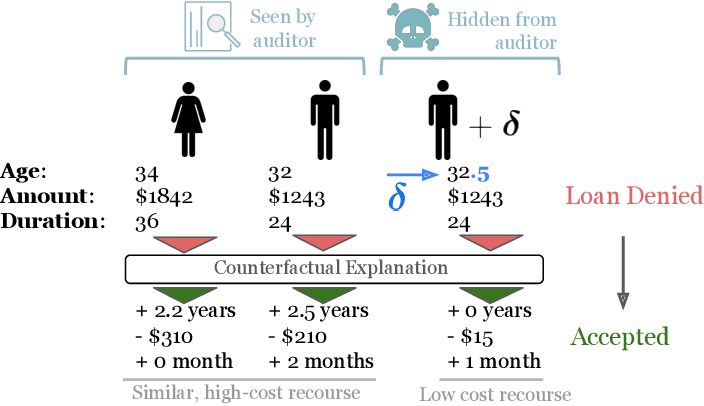

[Counterfactual Explanations Can Be Manipulated](https://www.semanticscholar.org/paper/Counterfactual-Explanations-Can-Be-Manipulated-Slack-Hilgard/be659a7747137ef85239d849f84c5a25dcb77639)



1. **Counterfactual Explanation**:
   Counterfactual explanation is an approach in the field of explainable Artificial Intelligence (AI) models that aims to generate examples of modified instances to explain how these modifications would affect the model's predictions.

   Unlike traditional explanations that simply describe important features for a given prediction, a counterfactual explanation describes a causal situation in the form of "If X had not occurred, Y would not have happened." For example, "If I hadn't taken a sip of this hot coffee, I wouldn't have burned my tongue." The event Y is that I burned my tongue; the cause X is that I had hot coffee. Thinking in counterfactual terms requires imagining a hypothetical reality that contradicts observed facts (for example, a world in which I didn't drink the hot coffee), hence the term "counterfactual." The ability to think in counterfactual terms makes us humans so intelligent compared to other animals.

2. **Counterfactual Explanation Techniques**:
   There are several techniques for generating counterfactual explanations, including:

   - **[Contrastive Explanations Method](https://arxiv.org/abs/1802.07623) (CEM)**: The Contrastive Explanations Method (CEM) can generate explanations for black-box models in terms of Relevant Positives (RP) and Relevant Negatives (RN). For RP, it finds what should be minimally and sufficiently present (e.g., important pixels in an image) to justify its classification. Conversely, RNs identify what should be minimally and necessarily absent from the explained instance to maintain the initial prediction ([tdoc](https://docs.seldon.io/projects/alibi/en/latest/examples/cem_iris.html)).

   - **[DiCE](https://github.com/interpretml/DiCE) (Diverse Counterfactual Explanations)**: DiCE generates counterfactual examples by diversely modifying features to explore different paths leading to different model predictions.

   - **[Counterfactual Explanation by Pairs of Imputation and Action](https://arxiv.org/abs/2304.14606) (CEPIA)**: This method allows users to obtain valid actions even in the presence of missing values and explains how actions are affected by imputing missing values. Specifically, CEPIA provides a representative set of pairs consisting of an imputation candidate for a given incomplete instance and its optimal action.

   [DiCE](https://github.com/interpretml/DiCE) implements counterfactual explanations (CF) that provide this information by showing perturbed feature versions of the same person who would have received the loan, for example, you would have received the loan if your income were $10,000 higher. In other words, it provides "what if" explanations for the model output and can be a useful complement to other explanation methods, both for end-users and model developers.

## Model Definition

### Data Splitting

In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
import tensorflow as tf
import keras

ann_model = keras.Sequential()
ann_model.add(keras.layers.Dense(100, input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
ann_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
ann_model.fit(X_train, y_train, validation_split=0.20, epochs=100, verbose=0)

In [ ]:
scores = ann_model.evaluate(X_train, y_train)

In [ ]:
import dice_ml
m = dice_ml.Model(model=ann_model)
d = dice_ml.Data(dataframe=data, continuous_features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], outcome_name='Outcome')

## Generate Diverse Counterfactuals.

In [ ]:
# initiate DiCE
exp_random = dice_ml.Dice(d, m, method="random")

In [ ]:
query_instances = X_train[4:6]
query_instances

In [ ]:
# generate counterfactuals
dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=2, desired_class="opposite", verbose=True)

In [ ]:
dice_exp_random.visualize_as_dataframe(show_only_changes=True)

### Feature Selection for Variation
Here, you can ensure that DiCE only varies the features that it makes sense to vary.

Exercice 3.1: Generate counterfactual explanations based on the previous model and using the `random` algorithm, specifying the attributes that can be modified on the input data.

Doc: https://github.com/interpretml/DiCE/tree/main

In [ ]:
# generate counterfactuals
# Your Code here

### Choosing Feature Ranges
Since features are randomly sampled, they can vary freely within their range. In the example below, the range of continuous features can be controlled using the `permit_range` parameter, which can now be passed during CF generation.

Exercice 3.2: In the continuation of exercise 2.1, specify the range within which attributes can vary.

Doc: https://github.com/interpretml/DiCE/tree/main

In [ ]:
# generate counterfactuals
# Your Code here

## Genetic Algorithm

Here, we demonstrate how to use DiCE to generate counterfactuals for any ML model using the genetic algorithm to find the best counterfactuals close to the query point. The genetic algorithm converges quickly and promotes diverse counterfactual hypotheses.


### ML model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical = X_train.columns.difference(numerical)

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

transformations = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', transformations),
                      ('classifier', RandomForestClassifier())])
model = clf.fit(X_train, y_train)

### Generate diversified counterfactuals

Exercise 3.3: The previous model was designed using a different backend. It is a random forest model built using sklearn.

a - Build a `Dice_ML` model that uses this model and specify the appropriate backend.

b - Use the constructed `Dice_ML` model to produce 10 counterfactual explanations for 4 examples from the dataset (as `Dice_ML` method use the `genetic` algorithm).

Doc: https://github.com/interpretml/DiCE/tree/main

In [ ]:
# provide the trained ML model to DiCE's model object
# Your Code here

### References

1 - Molnar, C. Interpretable Machine Learning. Available from: https://christophm.github.io/interpretable-ml-book/counterfactual.html.

2 - Wachter, S., Mittelstadt, B. & Russell, C. Counterfactual explanations without opening the black box: Automated decisions and the GDPR. Harv. JL & Tech. 31, 841 (2017).

3 - Dandl, S., Molnar, C., Binder, M. & Bischl, B. in International Conference on Parallel Problem Solving from Nature. 448–469 (Springer).

4 - Mothilal, R. K., Sharma, A. & Tan, C. in Proceedings of the 2020 Conference on Fairness, Accountability, and Transparency. 607–617.-

5 - Ribeiro, M. T., Singh, S., & Guestrin, C. (2016, August). " Why should i trust you?" Explaining the predictions of any classifier. In Proceedings of the 22nd ACM SIGKDD international conference on knowledge discovery and data mining (pp. 1135-1144).

6- Scott M Lundberg and Su-In Lee. A unified approach to interpreting model predictions.Advances in neural information processing systems, 30, 2017.